In [1]:
df <- read.csv('cleaned_data.csv')
head(df)

datetime            city     humidity pressure temperature wind_speed
1 2017-01-01 00:00:00 Portland 96       1017     35.582      3         
2 2017-01-01 01:00:00 Portland 96       1016     35.852      2         
3 2017-01-01 02:00:00 Portland 99       1015     35.600      3         
4 2017-01-01 03:00:00 Portland 99       1014     35.312      2         
5 2017-01-01 04:00:00 Portland 99       1013     34.826      1         
6 2017-01-01 05:00:00 Portland 86       1013     34.808      2         
  wind_direction latitude longitude weather
1 160            45.52345 -122.6762 foggy  
2 200            45.52345 -122.6762 rainy  
3 221            45.52345 -122.6762 foggy  
4 170            45.52345 -122.6762 rainy  
5 210            45.52345 -122.6762 rainy  
6 230            45.52345 -122.6762 snowy

In [2]:
library(dplyr)
# filtering city and weather 
transaction_data <- df %>% select('city', 'weather')
head(transaction_data)

Warning message:
“package ‘dplyr’ was built under R version 4.3.1”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




city     weather
1 Portland foggy  
2 Portland rainy  
3 Portland foggy  
4 Portland rainy  
5 Portland rainy  
6 Portland snowy

In [3]:
write.csv(transaction_data, file = "transaction_data.csv", row.names = FALSE)

In [4]:
# reading city and weather as transactions
library(arules)
weather_transactions <- read.transactions('transaction_data.csv', 
                                         rm.duplicates = FALSE,
                                         format = 'basket',
                                         sep = ",",
                                         cols = NULL)
inspect(weather_transactions[1:5])

Warning message:
“package ‘arules’ was built under R version 4.3.1”
Loading required package: Matrix


Attaching package: ‘arules’


The following object is masked from ‘package:dplyr’:

    recode


The following objects are masked from ‘package:base’:

    abbreviate, write




    items            
[1] {city, weather}  
[2] {Portland, foggy}
[3] {Portland, rainy}
[4] {Portland, foggy}
[5] {Portland, rainy}


In [5]:
# removing 1st transaction as it contains the column name
weather_transactions <- weather_transactions[-1, ]
inspect(weather_transactions[1:5])

    items            
[1] {Portland, foggy}
[2] {Portland, rainy}
[3] {Portland, foggy}
[4] {Portland, rainy}
[5] {Portland, rainy}


In [6]:
# generating rules with support = 0.0001 and confidence = 0.1
rules = arules::apriori(weather_transactions, 
                        parameter = list(support=0.0001, confidence=0.1, minlen=2))
rules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.1    0.1    1 none FALSE            TRUE       5   1e-04      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 21 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[34 item(s), 213435 transaction(s)] done [0.01s].
sorting and recoding items ... [34 item(s)] done [0.00s].
creating transaction tree ... done [0.03s].
checking subsets of size 1 2 done [0.00s].
writing ... [92 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 92 rules 

In [7]:
# printing the rules
inspect(rules)

     lhs                rhs           support      confidence coverage    
[1]  {other}         => {Los Angeles} 0.0001124464 0.1751825  0.0006418816
[2]  {snowy}         => {Minneapolis} 0.0011947431 0.1535220  0.0077822288
[3]  {snowy}         => {Detroit}     0.0012650221 0.1625527  0.0077822288
[4]  {snowy}         => {Pittsburgh}  0.0013212453 0.1697772  0.0077822288
[5]  {thunderstorm}  => {Miami}       0.0013071895 0.1111554  0.0117600206
[6]  {New York}      => {rainy}       0.0042542226 0.1260936  0.0337386089
[7]  {New York}      => {foggy}       0.0084241104 0.2496875  0.0337386089
[8]  {New York}      => {cloudy}      0.0102607351 0.3041244  0.0337386089
[9]  {New York}      => {clear}       0.0101154918 0.2998195  0.0337386089
[10] {Miami}         => {rainy}       0.0043385574 0.1285933  0.0337386089
[11] {Miami}         => {cloudy}      0.0230655703 0.6836550  0.0337386089
[12] {San Francisco} => {rainy}       0.0039684213 0.1176226  0.0337386089
[13] {San Francisco} => {

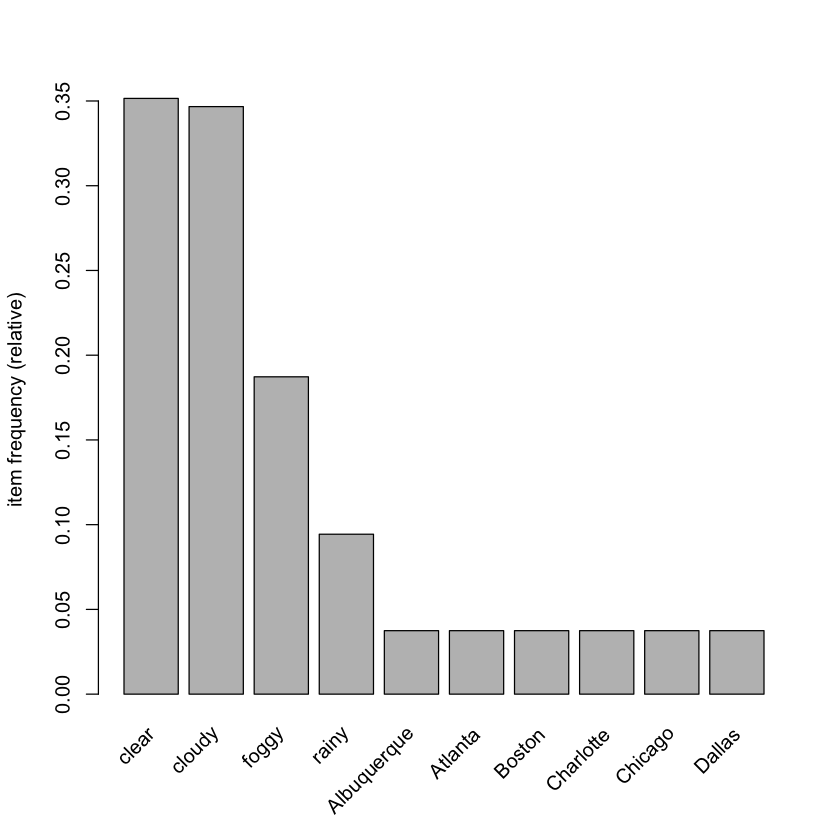

In [8]:
# plotting top 10 items based on frequency
itemFrequencyPlot(weather_transactions, topN=10, type="relative")

In [9]:
# filtering top 15 rules by support
sorted_rules_support <- sort(rules, by="support", decreasing=TRUE)
top_15_rules_support <- sorted_rules_support[1:15]
inspect(top_15_rules_support)

     lhs                rhs      support    confidence coverage   lift    
[1]  {Las Vegas}     => {clear}  0.02849111 0.7607907  0.03744934 2.164250
[2]  {Phoenix}       => {clear}  0.02707147 0.7228825  0.03744934 2.056411
[3]  {Albuquerque}   => {cloudy} 0.02423220 0.6470662  0.03744934 1.866456
[4]  {Miami}         => {cloudy} 0.02306557 0.6836550  0.03373861 1.971997
[5]  {Denver}        => {clear}  0.01949540 0.5205805  0.03744934 1.480915
[6]  {Kansas City}   => {clear}  0.01865205 0.4980608  0.03744934 1.416852
[7]  {Dallas}        => {cloudy} 0.01720899 0.4595271  0.03744934 1.325502
[8]  {Los Angeles}   => {clear}  0.01554572 0.4151132  0.03744934 1.180888
[9]  {Indianapolis}  => {clear}  0.01547544 0.4132366  0.03744934 1.175550
[10] {Saint Louis}   => {cloudy} 0.01527397 0.4078569  0.03744934 1.176459
[11] {San Diego}     => {foggy}  0.01527397 0.4078569  0.03744934 2.178234
[12] {San Francisco} => {foggy}  0.01525992 0.4522983  0.03373861 2.415581
[13] {Nashville}     => {

In [10]:
library(arulesViz)
plot(top_15_rules_support, method = 'graph', engine = 'htmlwidget')

HTML widgets cannot be represented in plain text (need html)

In [11]:
# filtering top 15 rules by confidence
sorted_rules_confidence <- sort(rules, by="confidence", decreasing=TRUE)
top_15_rules_confidence <- sorted_rules_confidence[1:15]
inspect(top_15_rules_confidence)

     lhs                rhs      support    confidence coverage   lift    
[1]  {Las Vegas}     => {clear}  0.02849111 0.7607907  0.03744934 2.164250
[2]  {Phoenix}       => {clear}  0.02707147 0.7228825  0.03744934 2.056411
[3]  {Miami}         => {cloudy} 0.02306557 0.6836550  0.03373861 1.971997
[4]  {Albuquerque}   => {cloudy} 0.02423220 0.6470662  0.03744934 1.866456
[5]  {Denver}        => {clear}  0.01949540 0.5205805  0.03744934 1.480915
[6]  {Kansas City}   => {clear}  0.01865205 0.4980608  0.03744934 1.416852
[7]  {Dallas}        => {cloudy} 0.01720899 0.4595271  0.03744934 1.325502
[8]  {San Francisco} => {foggy}  0.01525992 0.4522983  0.03373861 2.415581
[9]  {Los Angeles}   => {clear}  0.01554572 0.4151132  0.03744934 1.180888
[10] {Indianapolis}  => {clear}  0.01547544 0.4132366  0.03744934 1.175550
[11] {Saint Louis}   => {cloudy} 0.01527397 0.4078569  0.03744934 1.176459
[12] {San Diego}     => {foggy}  0.01527397 0.4078569  0.03744934 2.178234
[13] {Nashville}     => {

In [12]:
plot(top_15_rules_confidence, method = 'graph', engine = 'htmlwidget')

HTML widgets cannot be represented in plain text (need html)

In [13]:
# filtering top 15 rules by Lift
sorted_rules_lift <- sort(rules, by="lift", decreasing=TRUE)
top_15_rules_lift <- sorted_rules_lift[1:15]
inspect(top_15_rules_lift)

     lhs                rhs           support      confidence coverage    
[1]  {other}         => {Los Angeles} 0.0001124464 0.1751825  0.0006418816
[2]  {snowy}         => {Pittsburgh}  0.0013212453 0.1697772  0.0077822288
[3]  {snowy}         => {Detroit}     0.0012650221 0.1625527  0.0077822288
[4]  {snowy}         => {Minneapolis} 0.0011947431 0.1535220  0.0077822288
[5]  {thunderstorm}  => {Miami}       0.0013071895 0.1111554  0.0117600206
[6]  {Seattle}       => {rainy}       0.0085459273 0.2281997  0.0374493405
[7]  {San Francisco} => {foggy}       0.0152599152 0.4522983  0.0337386089
[8]  {San Diego}     => {foggy}       0.0152739710 0.4078569  0.0374493405
[9]  {Las Vegas}     => {clear}       0.0284911097 0.7607907  0.0374493405
[10] {Phoenix}       => {clear}       0.0270714738 0.7228825  0.0374493405
[11] {Miami}         => {cloudy}      0.0230655703 0.6836550  0.0337386089
[12] {Portland}      => {rainy}       0.0068545459 0.1830352  0.0374493405
[13] {Los Angeles}   => {

In [14]:
plot(top_15_rules_lift, method = 'graph', engine = 'htmlwidget')

HTML widgets cannot be represented in plain text (need html)

In [15]:
# generating rules for snowy weather i.e, city -> snowy
snow_rules <- apriori( data = weather_transactions, 
                      parameter = list(supp = 0.0001, conf = 0.01, minlen = 2),
                     appearance = list(default="lhs", rhs="snowy"),
                     control = list(verbose = FALSE))

snow_rules <- sort(snow_rules, by = 'confidence', decreasing = TRUE)
inspect(snow_rules[1:5])

    lhs              rhs     support      confidence coverage   lift     count
[1] {Pittsburgh}  => {snowy} 0.0013212453 0.03528087 0.03744934 4.533518 282  
[2] {Detroit}     => {snowy} 0.0012650221 0.03377956 0.03744934 4.340602 270  
[3] {Minneapolis} => {snowy} 0.0011947431 0.03190292 0.03744934 4.099457 255  
[4] {Chicago}     => {snowy} 0.0007027901 0.01876642 0.03744934 2.411446 150  
[5] {Denver}      => {snowy} 0.0006278258 0.01676467 0.03744934 2.154225 134  


In [16]:
plot(snow_rules[1:5], method = 'graph', engine = 'htmlwidget')

HTML widgets cannot be represented in plain text (need html)